 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import requests
import json
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(
    whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns_sum = whale_returns.isnull().sum()
clean_whale_returns = whale_returns.head()
print(whale_returns_sum)
print(clean_whale_returns)

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_history = sp500_history.sort_index()
sp500_history.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [15]:
# Check Data Types
sp500_history.dtypes

Close    float64
dtype: object

In [19]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].str.replace(",", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes


AttributeError: Can only use .str accessor with string values!

In [20]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [21]:
# Drop nulls
sp500_returns = sp500_returns.dropna().copy()
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [22]:
# Rename `Close` Column to be specific to this portfolio.
# sp500_returns.columns = ['Date', 'S&P 500']

sp500_returns = sp500_returns.rename(columns={"Close": "S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

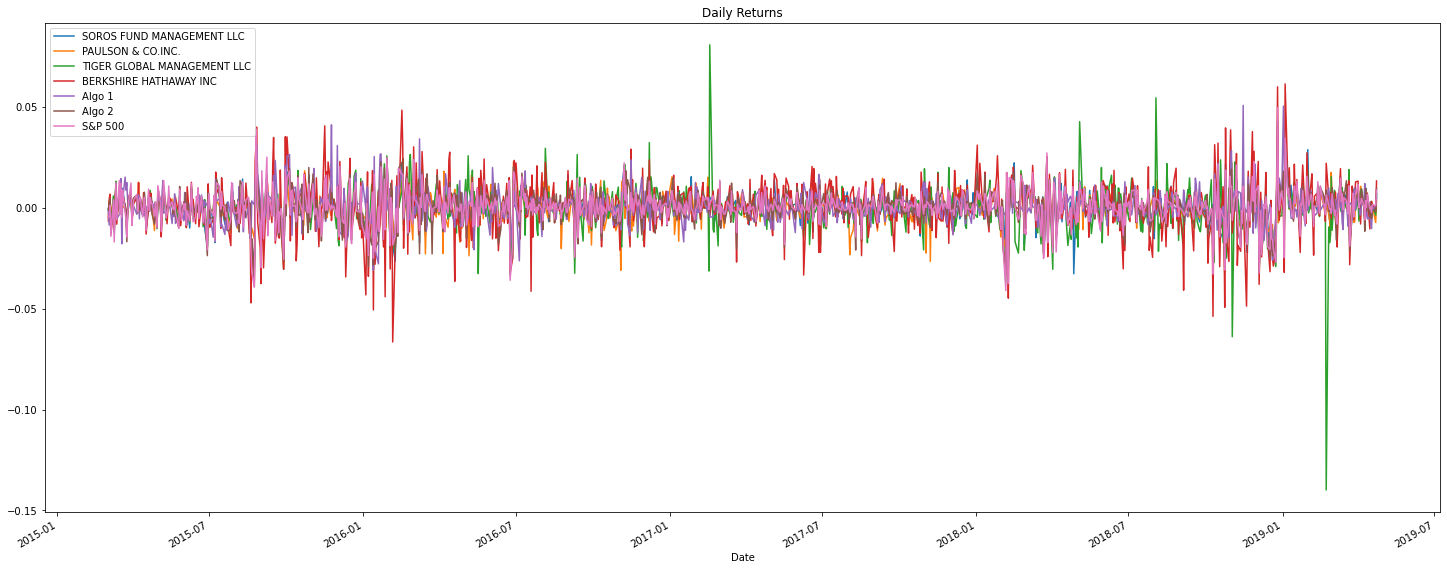

In [24]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(25, 10), title="Daily Returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

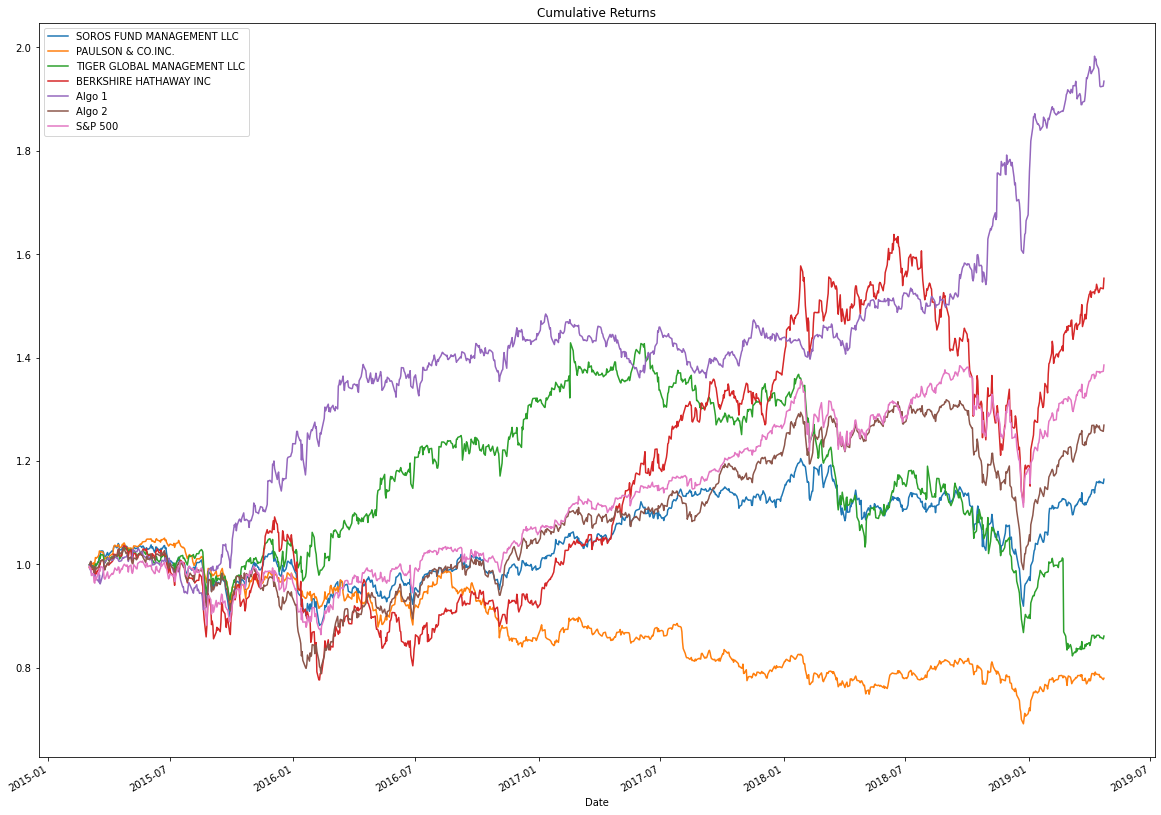

In [25]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 15), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

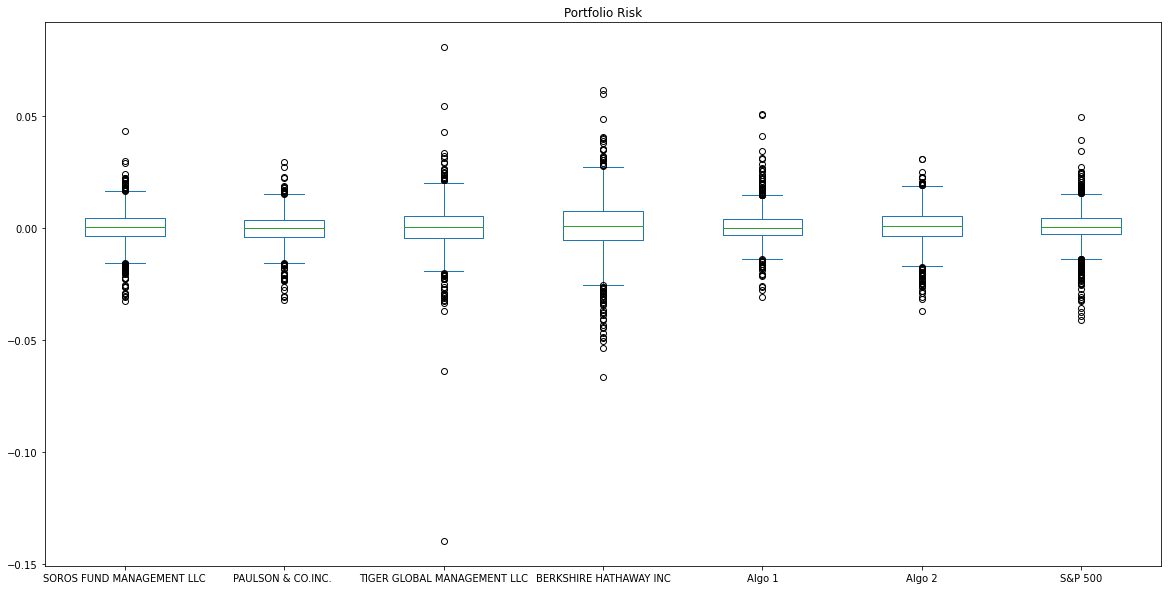

In [26]:
# Box plot to visually show risk
all_portfolios.plot.box(figsize=(20, 10), title="Portfolio Risk")

### Calculate Standard Deviations

In [27]:
# Calculate the daily standard deviations of all portfolios
all_portfolios.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [28]:
# Calculate  the daily standard deviation of S&P 500

sp500_risk = all_portfolios["S&P 500"].std()

# Determine which portfolios are riskier than the S&P 500
all_portfolios.std() > sp500_risk

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [29]:
# Calculate the annualized standard deviation (252 trading days)
yearly_std = all_portfolios.std() * np.sqrt(252)
yearly_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

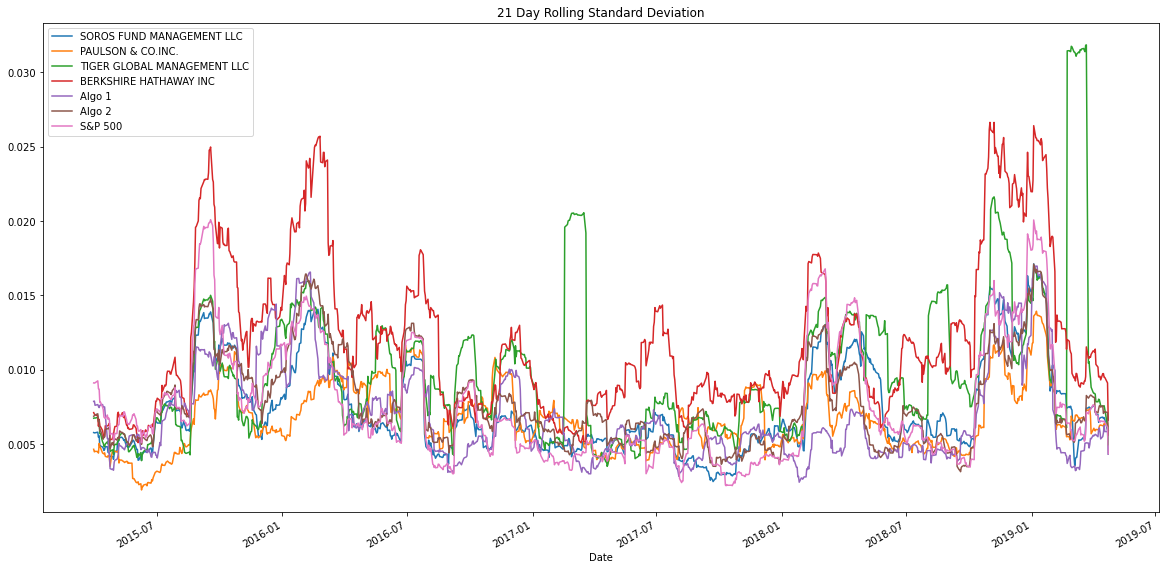

In [30]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_port_roll_std = all_portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
all_port_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [31]:
# Calculate the correlation

corr_port = all_portfolios.corr()

# Display de correlation matrix
corr_port.style.background_gradient(cmap="spring")


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC.Beta'}, xlabel='Date'>

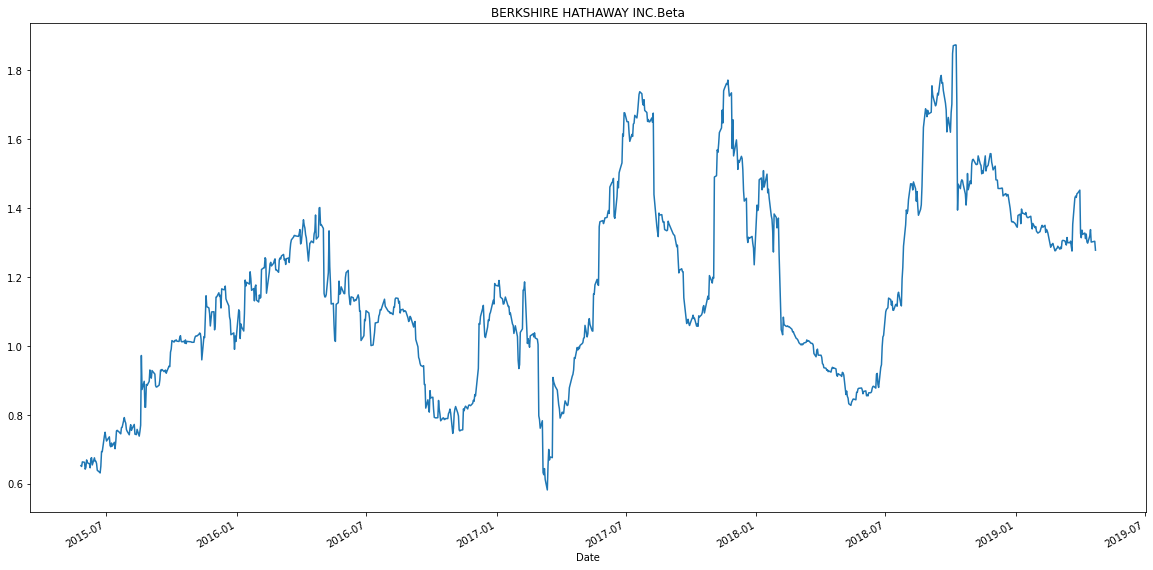

In [32]:
# Calculate covariance of a single portfolio
covariance = all_portfolios["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(all_portfolios["S&P 500"])

# Calculate variance of S&P TSX
variance = all_portfolios["S&P 500"].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20, 10), title="BERKSHIRE HATHAWAY INC.Beta")


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

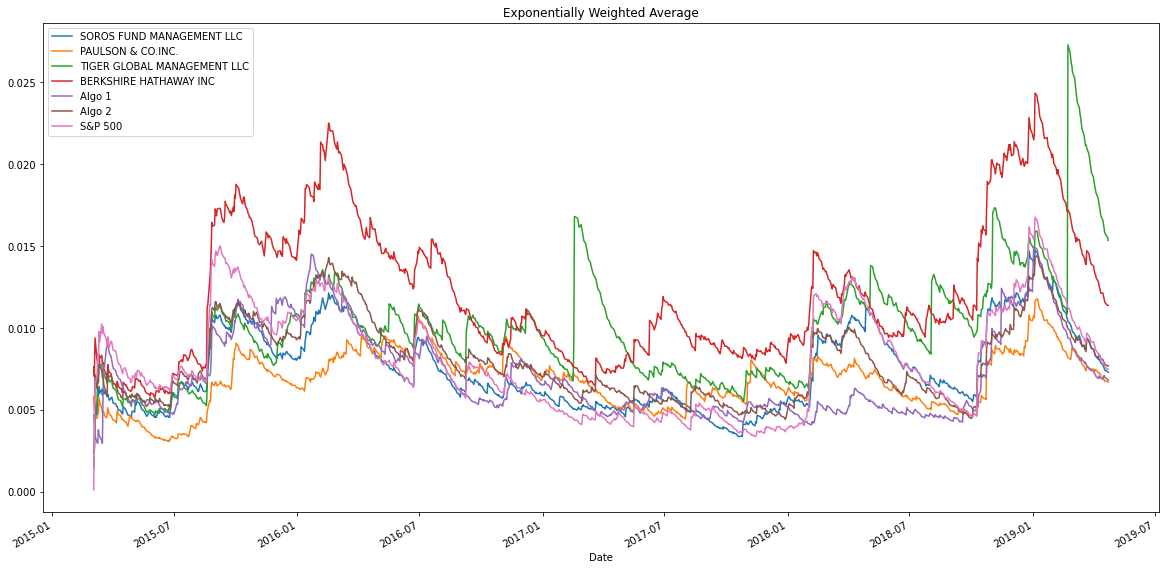

In [33]:
# Use `ewm` to calculate the rolling window
all_portfolios.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [34]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

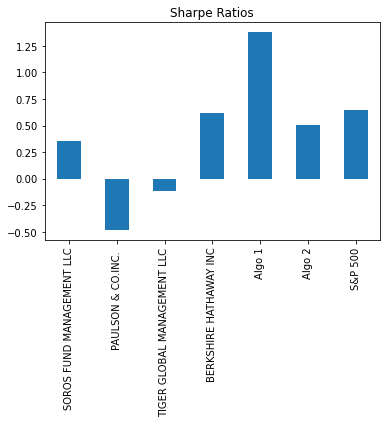

In [820]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Yes, Algo 1 out performs S&P 500

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `CAH` -  [Cardinal Health](https://en.wikipedia.org/wiki/Cardinal_Health)

* `SRE` -  [Sempra Energy](https://en.wikipedia.org/wiki/Sempra_Energy)

* `COST` - [Costco](https://en.wikipedia.org/wiki/Costco)



In [35]:
# Reading data from 1st stock
cardinal_historical_csv = Path("Resources/car_historical.csv")
cardinal_historical = pd.read_csv(cardinal_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cardinal_historical = cardinal_historical.sort_index()
cardinal_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,CAH,55.30
2018-05-14,CAH,55.16
2018-05-15,CAH,54.02
2018-05-16,CAH,54.51
2018-05-17,CAH,54.33


In [36]:
# Reading data from 2nd stock
sempra_historical_csv = Path("Resources/sre_historical.csv")
sempra_historical = pd.read_csv(sempra_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
sempra_historical = sempra_historical.sort_index()
sempra_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,SRE,107.08
2018-05-14,SRE,106.51
2018-05-15,SRE,105.24
2018-05-16,SRE,103.34
2018-05-17,SRE,102.18


In [37]:
# Reading data from 3rd stock
costco_historical_csv = Path("Resources/cost_historical.csv")
costco_historical = pd.read_csv(
    costco_historical_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
costco_historical = costco_historical.sort_index()
costco_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [38]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([costco_historical, sempra_historical, cardinal_historical], axis="rows", join="inner")
combined_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [39]:
# Reset Date index
combined_stocks = combined_stocks.reset_index()
combined_stocks.head(10)

,Trade DATE,Symbol,NOCP
0,2018-05-11,COST,195.76
1,2018-05-14,COST,195.88
2,2018-05-15,COST,195.48
3,2018-05-16,COST,198.71
4,2018-05-17,COST,199.60
5,2018-05-18,COST,198.96
6,2018-05-21,COST,199.62
7,2018-05-22,COST,198.97
8,2018-05-23,COST,198.14
9,2018-05-24,COST,198.89


In [40]:
# Reorganize portfolio data by having a column per symbol
portfolio = combined_stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
portfolio.head(10)

Symbol,CAH,COST,SRE
Trade DATE,,,
2018-05-11,55.30,195.76,107.08
2018-05-14,55.16,195.88,106.51
2018-05-15,54.02,195.48,105.24
2018-05-16,54.51,198.71,103.34
2018-05-17,54.33,199.60,102.18
2018-05-18,53.33,198.96,101.97
2018-05-21,53.13,199.62,102.64
2018-05-22,52.83,198.97,103.43
2018-05-23,52.69,198.14,104.86


In [41]:
# Calculate daily returns
daily_returns = portfolio.pct_change()

# Drop NAs
daily_returns = daily_returns.dropna().copy()

# Display sample data
daily_returns.head()

Symbol,CAH,COST,SRE
Trade DATE,,,
2018-05-14,-0.002532,0.000613,-0.005323
2018-05-15,-0.020667,-0.002042,-0.011924
2018-05-16,0.009071,0.016523,-0.018054
2018-05-17,-0.003302,0.004479,-0.011225
2018-05-18,-0.018406,-0.003206,-0.002055


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights

weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
w_portfolios = daily_returns.dot(weights)

# Display sample data
w_portfolios.head()

Trade DATE
2018-05-14   -0.002414
2018-05-15   -0.011544
2018-05-16    0.002513
2018-05-17   -0.003349
2018-05-18   -0.007889
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame

all_portfolios["Custom"] = w_portfolios
all_portfolios.tail() # Use tail fuction to return the last five entries since the newest entry is at the bottom of the column

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.007021
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.012982
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.008972
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.013914
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.010964


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# If one of the columns returns NaNs no data will be populated
 
all_portfolios = all_portfolios.dropna().copy()
all_portfolios.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.007021
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.012982
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.008972
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,-0.013914
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.010964


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`
# Cypto assets operate 365 Days unlike the traditional 252 for the Stock Exchange

risk = all_portfolios.std() * np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.165366
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

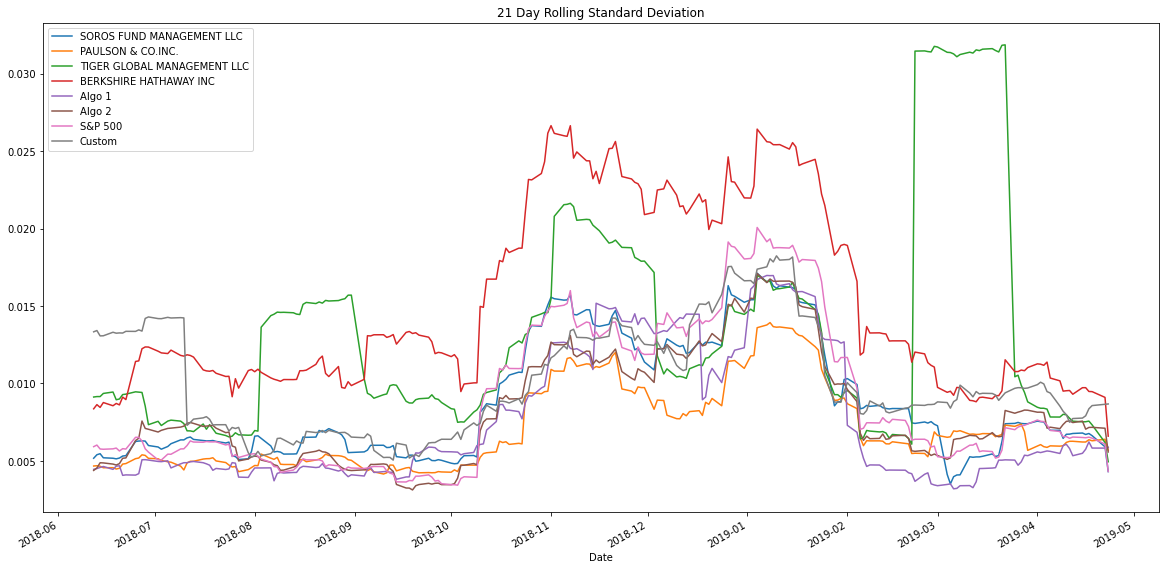

In [46]:
# Calculate rolling standard deviation
roll_std_dev = all_portfolios.rolling(window=21).std()

# Plot rolling standard deviation
roll_std_dev.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation
# Closely correlated stock will have similar or closer color match

df = all_portfolios.corr()
df.style.background_gradient(cmap="hot")

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.541812
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.541443
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.452102
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.378777
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.131617
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.539688
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.607661
Custom,0.541812,0.541443,0.452102,0.378777,0.131617,0.539688,0.607661,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Custom Portfolio Beta'}, xlabel='Date'>

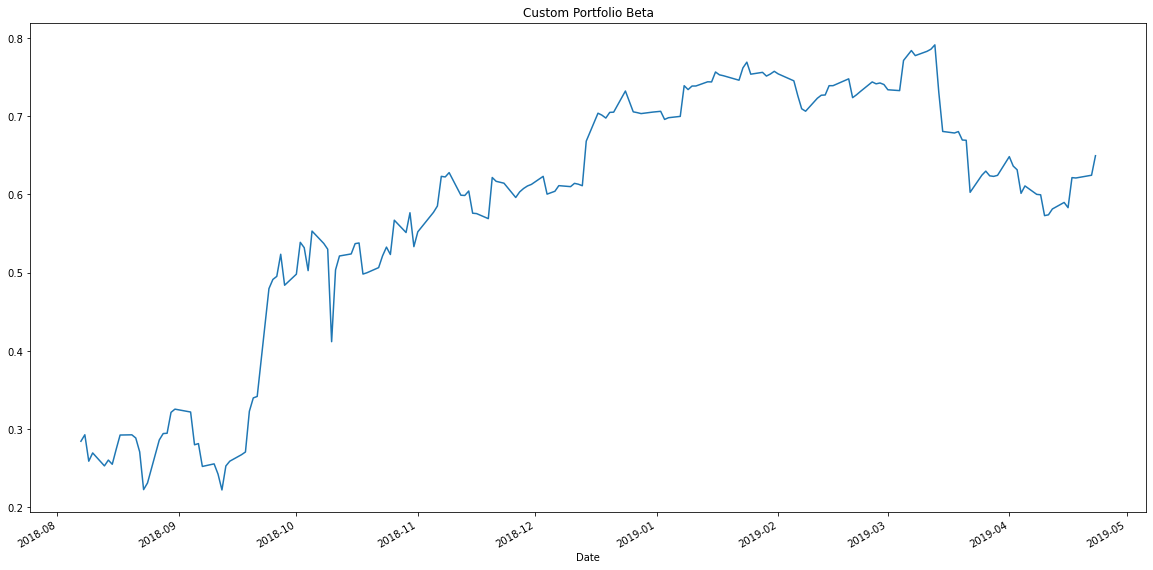

In [49]:
# Calculate and plot Beta
covariance = all_portfolios["Custom"].rolling(window=60).cov(all_portfolios["S&P 500"])
variance = all_portfolios["S&P 500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20, 10), title="Custom Portfolio Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [50]:
# Calculate Annualzied Sharpe Ratios
# Negative returns are not good always looking positive

sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.615673
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

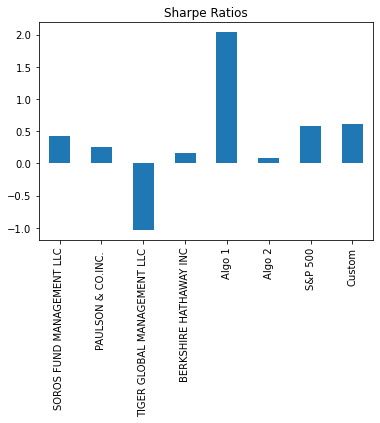

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

My custom portfolio is not bad at all. It clipped the S&P 500 by a few percentage points which is really good given they are non Tech Stocks.